In [1]:
import pandas as pd
import numpy as np
from time import time
import pickle
import gensim
from gensim.models import FastText, Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import multiprocessing

In [2]:
# C compiler 확인
# 우분투에서 가능
gensim.models.word2vec.FAST_VERSION

1

## loading data

In [6]:
with open('zebal_version2.pickle', 'rb') as f:
    df = pickle.load(f)

In [7]:
# 가입 인사 제거
df = df[df['board']!='가입 인사 (등업 필수)']
df = df.reset_index()

In [66]:
df.shape

(28569, 13)

In [5]:
sentences = df['morphs']

## ready

In [7]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [8]:
cores = multiprocessing.cpu_count()
cores

4

## 1. Word2Vec

In [14]:
6e-05

6e-05

In [9]:
w2v = Word2Vec(size=300,  #300,
               window=5,
               min_count=20,    # 이거보다 적게 출현한 단어는 무시
               sample=6e-5,     # 이거보다 많이 출현한 단어는 무시
               workers=cores-1,
               negative=20,     # negative sampling
               alpha=0.03,      # initial learning rate
               min_alpha=0.0007,
               sg=0)            # 1이면 skip-gram, 0이면 CBOW

In [10]:
t = time()

w2v.build_vocab(sentences, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

2019-06-25 18:42:49,692 : INFO : collecting all words and their counts
2019-06-25 18:42:49,695 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-06-25 18:42:50,484 : INFO : PROGRESS: at sentence #10000, processed 1793992 words, keeping 40453 word types
2019-06-25 18:42:51,408 : INFO : PROGRESS: at sentence #20000, processed 4175844 words, keeping 65367 word types
2019-06-25 18:42:52,232 : INFO : collected 79959 word types from a corpus of 6266305 raw words and 28569 sentences
2019-06-25 18:42:52,233 : INFO : Loading a fresh vocabulary
2019-06-25 18:42:52,363 : INFO : effective_min_count=20 retains 11396 unique words (14% of original 79959, drops 68563)
2019-06-25 18:42:52,364 : INFO : effective_min_count=20 leaves 6051529 word corpus (96% of original 6266305, drops 214776)
2019-06-25 18:42:52,455 : INFO : deleting the raw counts dictionary of 79959 items
2019-06-25 18:42:52,459 : INFO : sample=6e-05 downsamples 848 most-common words
2019-06-25 18:42:52,460

Time to build vocab: 0.05 mins


In [11]:
t = time()

w2v.train(sentences, total_examples=w2v.corpus_count, epochs=10, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

2019-06-25 18:42:54,586 : INFO : training model with 3 workers on 11396 vocabulary and 300 features, using sg=0 hs=0 sample=6e-05 negative=20 window=5
2019-06-25 18:42:55,648 : INFO : EPOCH 1 - PROGRESS: at 6.21% examples, 120490 words/s, in_qsize 5, out_qsize 0
2019-06-25 18:42:56,683 : INFO : EPOCH 1 - PROGRESS: at 14.40% examples, 135126 words/s, in_qsize 6, out_qsize 0
2019-06-25 18:42:57,716 : INFO : EPOCH 1 - PROGRESS: at 22.05% examples, 138965 words/s, in_qsize 6, out_qsize 0
2019-06-25 18:42:58,748 : INFO : EPOCH 1 - PROGRESS: at 28.29% examples, 135000 words/s, in_qsize 5, out_qsize 0
2019-06-25 18:42:59,754 : INFO : EPOCH 1 - PROGRESS: at 31.30% examples, 127553 words/s, in_qsize 6, out_qsize 1
2019-06-25 18:43:00,819 : INFO : EPOCH 1 - PROGRESS: at 35.94% examples, 125625 words/s, in_qsize 5, out_qsize 0
2019-06-25 18:43:01,872 : INFO : EPOCH 1 - PROGRESS: at 40.19% examples, 125553 words/s, in_qsize 5, out_qsize 0
2019-06-25 18:43:02,885 : INFO : EPOCH 1 - PROGRESS: at 44.

2019-06-25 18:44:00,197 : INFO : EPOCH 4 - PROGRESS: at 20.76% examples, 133132 words/s, in_qsize 5, out_qsize 0
2019-06-25 18:44:01,256 : INFO : EPOCH 4 - PROGRESS: at 27.54% examples, 131492 words/s, in_qsize 5, out_qsize 1
2019-06-25 18:44:02,277 : INFO : EPOCH 4 - PROGRESS: at 32.23% examples, 131421 words/s, in_qsize 5, out_qsize 0
2019-06-25 18:44:03,280 : INFO : EPOCH 4 - PROGRESS: at 37.15% examples, 134368 words/s, in_qsize 6, out_qsize 0
2019-06-25 18:44:04,331 : INFO : EPOCH 4 - PROGRESS: at 43.07% examples, 136934 words/s, in_qsize 5, out_qsize 0
2019-06-25 18:44:05,342 : INFO : EPOCH 4 - PROGRESS: at 48.61% examples, 139408 words/s, in_qsize 5, out_qsize 0
2019-06-25 18:44:06,371 : INFO : EPOCH 4 - PROGRESS: at 54.66% examples, 141118 words/s, in_qsize 5, out_qsize 0
2019-06-25 18:44:07,422 : INFO : EPOCH 4 - PROGRESS: at 60.03% examples, 142403 words/s, in_qsize 5, out_qsize 0
2019-06-25 18:44:08,427 : INFO : EPOCH 4 - PROGRESS: at 65.26% examples, 143901 words/s, in_qsiz

2019-06-25 18:45:05,016 : INFO : EPOCH 7 - PROGRESS: at 83.71% examples, 142453 words/s, in_qsize 5, out_qsize 0
2019-06-25 18:45:06,035 : INFO : EPOCH 7 - PROGRESS: at 88.04% examples, 141266 words/s, in_qsize 5, out_qsize 1
2019-06-25 18:45:07,038 : INFO : EPOCH 7 - PROGRESS: at 92.97% examples, 140344 words/s, in_qsize 4, out_qsize 1
2019-06-25 18:45:08,053 : INFO : EPOCH 7 - PROGRESS: at 98.06% examples, 139855 words/s, in_qsize 5, out_qsize 0
2019-06-25 18:45:08,450 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-06-25 18:45:08,498 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-06-25 18:45:08,529 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-06-25 18:45:08,530 : INFO : EPOCH - 7 : training on 6266305 raw words (2633781 effective words) took 18.9s, 139450 effective words/s
2019-06-25 18:45:09,557 : INFO : EPOCH 8 - PROGRESS: at 6.99% examples, 137391 words/s, in_qsize 5, out_qsize 0
2019-06-25 18:45:10,598 :

2019-06-25 18:46:05,332 : INFO : training on a 62663050 raw words (26336604 effective words) took 190.7s, 138073 effective words/s


Time to train the model: 3.18 mins


In [10]:
#w2v.init_sims(replace=True)

2019-06-25 10:26:05,803 : INFO : precomputing L2-norms of word weight vectors


In [12]:
w2v.save("word2vec_cbow.model")

2019-06-25 18:47:14,979 : INFO : saving Word2Vec object under word2vec_cbow.model, separately None
2019-06-25 18:47:14,984 : INFO : not storing attribute vectors_norm
2019-06-25 18:47:14,992 : INFO : not storing attribute cum_table
/home/jinny/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2019-06-25 18:47:16,042 : INFO : saved word2vec_cbow.model


In [14]:
w2v.wv.most_similar(positive=['남자'])

[('여자', 0.8822277784347534),
 ('남자에게', 0.6038217544555664),
 ('여자애', 0.5997026562690735),
 ('이성애자', 0.5374317169189453),
 ('연하', 0.5330287218093872),
 ('여자친구', 0.5316303372383118),
 ('동갑', 0.5236164331436157),
 ('여자도', 0.5032495260238647),
 ('여성', 0.49014362692832947),
 ('잘생기다', 0.4830986559391022)]

In [12]:
w2v.wv.similarity('유형', '보다')

0.9985274

In [13]:
w2v['유형']

c:\users\jinny\miniconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.01175345,  0.15760893,  0.2970345 , -0.03159487,  0.02351004,
        0.01128384, -0.2212294 ,  0.29617596,  0.259989  ,  0.05081538,
       -0.01663326,  0.15921934,  0.20837107, -0.21593526, -0.10980807,
        0.01668691,  0.10553514, -0.37878123,  0.171396  , -0.14100821,
       -0.03201051,  0.40319726, -0.01870311, -0.33470306,  0.02611067,
       -0.03406856,  0.12702604,  0.00983942, -0.09850258,  0.20650648],
      dtype=float32)

In [3]:
w2v = Word2Vec.load("word2vec_cbow.model")

c:\users\jinny\miniconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [9]:
len(w2v.wv.vocab)

11396

In [90]:
def convert2vec(a):
    temp = np.zeros(300)
    cnt = 0
    for token in a:
        try:
            temp += w2v.wv[token]
        except:
            cnt += 1
    return temp/(len(a)-cnt)

In [93]:
df['w2v_cbow_avg'] = df['morphs'].apply(convert2vec)

In [101]:
with open('w2v_cbow_embedding.pickle', 'wb') as f:
    pickle.dump(df['w2v_cbow_avg'], f)

In [102]:
with open('w2v_cbow_embedding.pickle', 'rb') as f:
    test = pickle.load(f)

### 약간의 t-SNE

In [10]:
vocab = list(w2v.wv.vocab)

In [52]:
X = w2v[vocab]

/home/jinny/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [67]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib as mpl

In [68]:
mpl.rcParams['axes.unicode_minus'] = False

In [69]:
tsne = TSNE(n_components=2)

In [71]:
# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[100:1000])

In [72]:
df = pd.DataFrame(X_tsne, index=vocab[100:1000], columns=['x', 'y'])
df.shape

(900, 2)

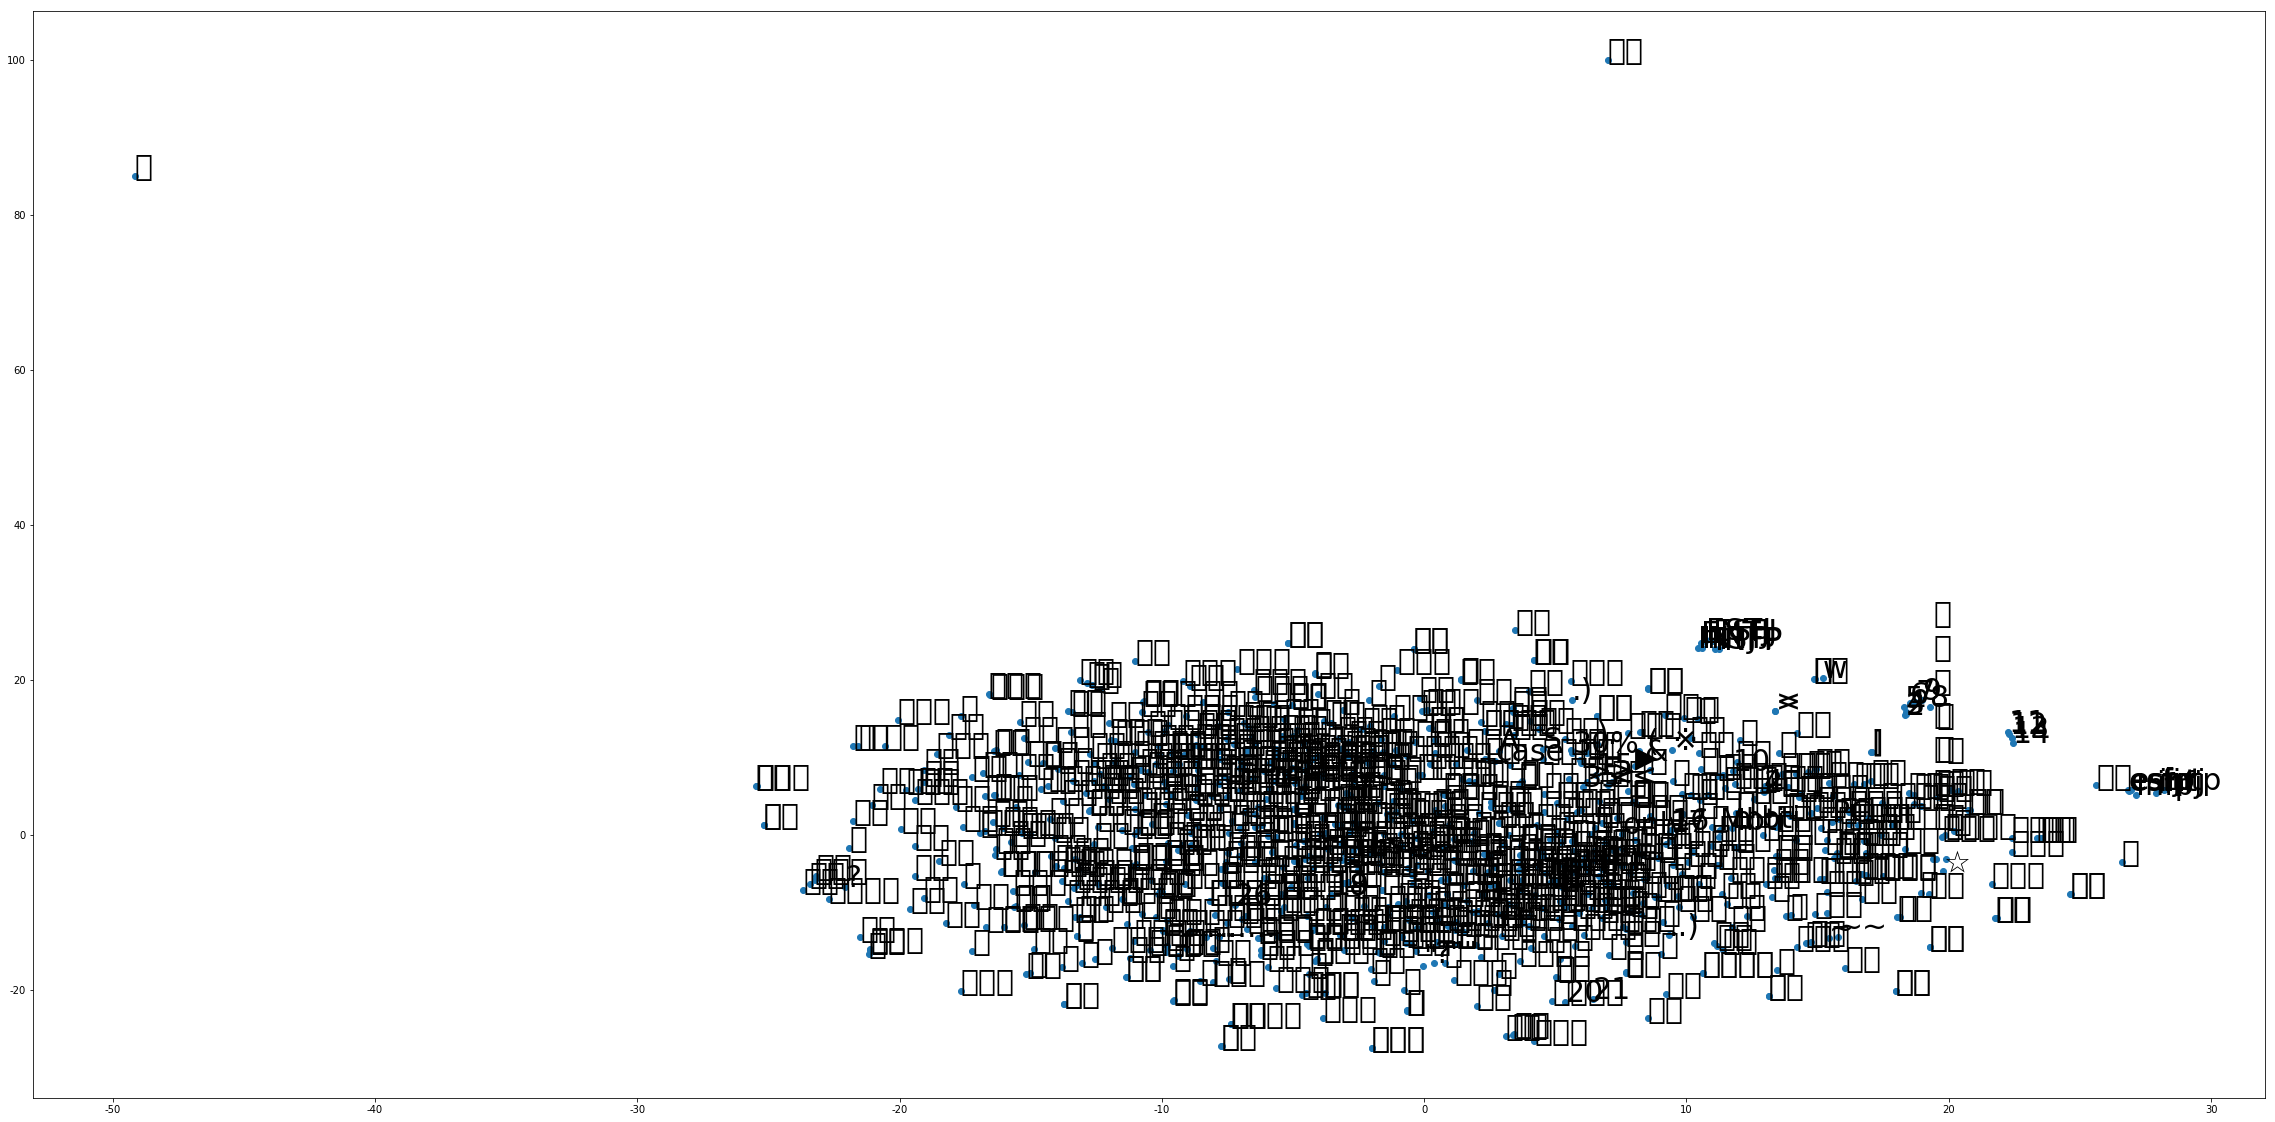

In [73]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()

## 2. FastText

In [9]:
ft = FastText(size=300,  #300,
              window=5,
              min_count=20,    # 이거보다 적게 출현한 단어는 무시
              sample=6e-5,     # 이거보다 많이 출현한 단어는 무시
              workers=cores-1,
              negative=20,     # negative sampling
              alpha=0.03,      # initial learning rate
              min_alpha=0.0007,
              sg=0)            # 1이면 skip-gram, 0이면 CBOW

2019-06-25 20:31:49,658 : INFO : resetting layer weights


In [10]:
t = time()

ft.build_vocab(sentences, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

2019-06-25 20:34:29,107 : INFO : collecting all words and their counts
2019-06-25 20:34:29,246 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-06-25 20:34:31,835 : INFO : PROGRESS: at sentence #10000, processed 1793992 words, keeping 40453 word types
2019-06-25 20:34:33,817 : INFO : PROGRESS: at sentence #20000, processed 4175844 words, keeping 65367 word types
2019-06-25 20:34:35,605 : INFO : collected 79959 word types from a corpus of 6266305 raw words and 28569 sentences
2019-06-25 20:34:35,607 : INFO : Loading a fresh vocabulary
2019-06-25 20:34:35,861 : INFO : effective_min_count=20 retains 11396 unique words (14% of original 79959, drops 68563)
2019-06-25 20:34:35,863 : INFO : effective_min_count=20 leaves 6051529 word corpus (96% of original 6266305, drops 214776)
2019-06-25 20:34:35,980 : INFO : deleting the raw counts dictionary of 79959 items
2019-06-25 20:34:36,021 : INFO : sample=6e-05 downsamples 848 most-common words
2019-06-25 20:34:36,023

Time to build vocab: 2.4 mins


In [11]:
t = time()

ft.train(sentences, total_examples=ft.corpus_count, epochs=10, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

2019-06-25 20:35:48,719 : INFO : training model with 3 workers on 11396 vocabulary and 300 features, using sg=0 hs=0 sample=6e-05 negative=20 window=5
2019-06-25 20:35:49,960 : INFO : EPOCH 1 - PROGRESS: at 0.69% examples, 18076 words/s, in_qsize 4, out_qsize 1
2019-06-25 20:35:51,033 : INFO : EPOCH 1 - PROGRESS: at 4.66% examples, 46437 words/s, in_qsize 5, out_qsize 0
2019-06-25 20:35:52,074 : INFO : EPOCH 1 - PROGRESS: at 9.84% examples, 58186 words/s, in_qsize 6, out_qsize 0
2019-06-25 20:35:53,119 : INFO : EPOCH 1 - PROGRESS: at 14.40% examples, 65760 words/s, in_qsize 5, out_qsize 0
2019-06-25 20:35:54,178 : INFO : EPOCH 1 - PROGRESS: at 19.78% examples, 71470 words/s, in_qsize 5, out_qsize 0
2019-06-25 20:35:55,200 : INFO : EPOCH 1 - PROGRESS: at 23.95% examples, 73229 words/s, in_qsize 6, out_qsize 0
2019-06-25 20:35:56,257 : INFO : EPOCH 1 - PROGRESS: at 27.97% examples, 74334 words/s, in_qsize 5, out_qsize 0
2019-06-25 20:35:57,281 : INFO : EPOCH 1 - PROGRESS: at 30.58% examp

2019-06-25 20:36:59,094 : INFO : EPOCH 3 - PROGRESS: at 19.09% examples, 89422 words/s, in_qsize 5, out_qsize 0
2019-06-25 20:37:00,099 : INFO : EPOCH 3 - PROGRESS: at 23.24% examples, 88971 words/s, in_qsize 6, out_qsize 0
2019-06-25 20:37:01,106 : INFO : EPOCH 3 - PROGRESS: at 27.54% examples, 88954 words/s, in_qsize 5, out_qsize 0
2019-06-25 20:37:02,131 : INFO : EPOCH 3 - PROGRESS: at 30.58% examples, 88567 words/s, in_qsize 6, out_qsize 0
2019-06-25 20:37:03,136 : INFO : EPOCH 3 - PROGRESS: at 33.50% examples, 88001 words/s, in_qsize 4, out_qsize 1
2019-06-25 20:37:04,155 : INFO : EPOCH 3 - PROGRESS: at 36.68% examples, 88558 words/s, in_qsize 6, out_qsize 0
2019-06-25 20:37:05,183 : INFO : EPOCH 3 - PROGRESS: at 39.40% examples, 87589 words/s, in_qsize 5, out_qsize 0
2019-06-25 20:37:06,268 : INFO : EPOCH 3 - PROGRESS: at 42.95% examples, 86667 words/s, in_qsize 4, out_qsize 2
2019-06-25 20:37:07,340 : INFO : EPOCH 3 - PROGRESS: at 45.42% examples, 85344 words/s, in_qsize 5, out_

2019-06-25 20:38:08,228 : INFO : EPOCH 5 - PROGRESS: at 43.07% examples, 96846 words/s, in_qsize 6, out_qsize 0
2019-06-25 20:38:09,238 : INFO : EPOCH 5 - PROGRESS: at 46.95% examples, 97377 words/s, in_qsize 5, out_qsize 0
2019-06-25 20:38:10,246 : INFO : EPOCH 5 - PROGRESS: at 49.88% examples, 96807 words/s, in_qsize 6, out_qsize 0
2019-06-25 20:38:11,345 : INFO : EPOCH 5 - PROGRESS: at 53.69% examples, 96139 words/s, in_qsize 6, out_qsize 0
2019-06-25 20:38:12,361 : INFO : EPOCH 5 - PROGRESS: at 57.30% examples, 96088 words/s, in_qsize 5, out_qsize 0
2019-06-25 20:38:13,394 : INFO : EPOCH 5 - PROGRESS: at 60.51% examples, 96356 words/s, in_qsize 6, out_qsize 0
2019-06-25 20:38:14,413 : INFO : EPOCH 5 - PROGRESS: at 63.61% examples, 96343 words/s, in_qsize 5, out_qsize 0
2019-06-25 20:38:15,422 : INFO : EPOCH 5 - PROGRESS: at 67.08% examples, 96455 words/s, in_qsize 6, out_qsize 0
2019-06-25 20:38:16,432 : INFO : EPOCH 5 - PROGRESS: at 70.33% examples, 96165 words/s, in_qsize 6, out_

2019-06-25 20:39:17,162 : INFO : EPOCH 7 - PROGRESS: at 55.60% examples, 91803 words/s, in_qsize 5, out_qsize 0
2019-06-25 20:39:18,170 : INFO : EPOCH 7 - PROGRESS: at 59.06% examples, 92190 words/s, in_qsize 6, out_qsize 0
2019-06-25 20:39:19,222 : INFO : EPOCH 7 - PROGRESS: at 61.93% examples, 92347 words/s, in_qsize 6, out_qsize 0
2019-06-25 20:39:20,268 : INFO : EPOCH 7 - PROGRESS: at 64.96% examples, 91850 words/s, in_qsize 6, out_qsize 0
2019-06-25 20:39:21,350 : INFO : EPOCH 7 - PROGRESS: at 67.34% examples, 90303 words/s, in_qsize 5, out_qsize 0
2019-06-25 20:39:22,359 : INFO : EPOCH 7 - PROGRESS: at 69.88% examples, 89236 words/s, in_qsize 4, out_qsize 1
2019-06-25 20:39:23,400 : INFO : EPOCH 7 - PROGRESS: at 72.81% examples, 89033 words/s, in_qsize 6, out_qsize 0
2019-06-25 20:39:24,455 : INFO : EPOCH 7 - PROGRESS: at 75.81% examples, 88390 words/s, in_qsize 4, out_qsize 1
2019-06-25 20:39:25,470 : INFO : EPOCH 7 - PROGRESS: at 78.46% examples, 88511 words/s, in_qsize 6, out_

2019-06-25 20:40:26,162 : INFO : EPOCH 9 - PROGRESS: at 86.94% examples, 96758 words/s, in_qsize 6, out_qsize 0
2019-06-25 20:40:27,233 : INFO : EPOCH 9 - PROGRESS: at 90.43% examples, 96602 words/s, in_qsize 6, out_qsize 0
2019-06-25 20:40:28,270 : INFO : EPOCH 9 - PROGRESS: at 94.26% examples, 96508 words/s, in_qsize 5, out_qsize 1
2019-06-25 20:40:29,278 : INFO : EPOCH 9 - PROGRESS: at 98.20% examples, 96784 words/s, in_qsize 6, out_qsize 0
2019-06-25 20:40:29,762 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-06-25 20:40:29,828 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-06-25 20:40:29,835 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-06-25 20:40:29,836 : INFO : EPOCH - 9 : training on 6266305 raw words (2632939 effective words) took 27.2s, 96821 effective words/s
2019-06-25 20:40:30,874 : INFO : EPOCH 10 - PROGRESS: at 4.43% examples, 92071 words/s, in_qsize 6, out_qsize 0
2019-06-25 20:40:31,886 : INFO

Time to train the model: 5.25 mins


In [17]:
#ft.init_sims(replace=True)

2019-06-25 10:26:17,718 : INFO : precomputing L2-norms of word weight vectors
2019-06-25 10:26:17,724 : INFO : precomputing L2-norms of ngram weight vectors


In [12]:
ft.save("FastText_cbow.model")

2019-06-25 20:41:03,448 : INFO : saving FastText object under FastText_cbow.model, separately None
2019-06-25 20:41:03,473 : INFO : storing np array 'vectors_ngrams' to FastText_cbow.model.wv.vectors_ngrams.npy
2019-06-25 20:41:35,310 : INFO : not storing attribute vectors_norm
2019-06-25 20:41:35,331 : INFO : not storing attribute vectors_vocab_norm
2019-06-25 20:41:35,332 : INFO : not storing attribute vectors_ngrams_norm
2019-06-25 20:41:35,333 : INFO : not storing attribute buckets_word
2019-06-25 20:41:35,338 : INFO : storing np array 'vectors_ngrams_lockf' to FastText_cbow.model.trainables.vectors_ngrams_lockf.npy
/home/jinny/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2019-06

In [13]:
ft.wv.most_similar(positive=['유형'])

2019-06-25 20:41:52,443 : INFO : precomputing L2-norms of word weight vectors
2019-06-25 20:41:52,621 : INFO : precomputing L2-norms of ngram weight vectors


[('이유형', 0.7127261757850647),
 ('Mbti', 0.6098856329917908),
 ('MBTI', 0.5990704298019409),
 ('에니어그램', 0.5841941833496094),
 ('궁합', 0.5738887190818787),
 ('성격', 0.5657591819763184),
 ('엠그램', 0.5443328619003296),
 ('STP', 0.5196093320846558),
 ('특징', 0.5180965662002563),
 ('DISC', 0.5171775817871094)]

In [19]:
ft.wv.similarity('유형', '보다')

0.998917

In [104]:
ft = FastText.load("FastText_cbow.model")

/home/jinny/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [105]:
def convert2vec(a):
    temp = np.zeros(300)
    for token in a:
        temp += ft.wv[token]
    return temp/len(a)

In [107]:
df['ft_cbow_avg'] = df['morphs'].apply(convert2vec)

In [109]:
with open('ft_cbow_embedding.pickle', 'wb') as f:
    pickle.dump(df['ft_cbow_avg'], f)

In [110]:
with open('ft_cbow_embedding.pickle', 'rb') as f:
    test = pickle.load(f)

## 3. Doc2vec

In [14]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(sentences)]

In [15]:
d2v = Doc2Vec(vector_size=300,  #300,
              window=2,
              min_count=20,    # 이거보다 적게 출현한 단어는 무시
              sample=6e-5,     # 이거보다 많이 출현한 단어는 무시
              workers=cores-1,
              negative=20,     # negative sampling
              alpha=0.03,      # initial learning rate
              min_alpha=0.0007,
              dm=0)

In [16]:
t = time()

d2v.build_vocab(documents, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

2019-06-25 20:43:25,549 : INFO : collecting all words and their counts
2019-06-25 20:43:25,552 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2019-06-25 20:43:26,611 : INFO : PROGRESS: at example #10000, processed 1793992 words (1698283/s), 40453 word types, 10000 tags
2019-06-25 20:43:27,797 : INFO : PROGRESS: at example #20000, processed 4175844 words (2010955/s), 65367 word types, 20000 tags
2019-06-25 20:43:28,929 : INFO : collected 79959 word types and 28569 unique tags from a corpus of 28569 examples and 6266305 words
2019-06-25 20:43:28,931 : INFO : Loading a fresh vocabulary
2019-06-25 20:43:29,084 : INFO : effective_min_count=20 retains 11396 unique words (14% of original 79959, drops 68563)
2019-06-25 20:43:29,086 : INFO : effective_min_count=20 leaves 6051529 word corpus (96% of original 6266305, drops 214776)
2019-06-25 20:43:29,253 : INFO : deleting the raw counts dictionary of 79959 items
2019-06-25 20:43:29,258 : INFO : sample=6e-05 downs

Time to build vocab: 0.1 mins


In [17]:
t = time()

d2v.train(documents, total_examples=d2v.corpus_count, epochs=10, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

2019-06-25 20:43:31,304 : INFO : training model with 3 workers on 11396 vocabulary and 300 features, using sg=1 hs=0 sample=6e-05 negative=20 window=2
2019-06-25 20:43:32,369 : INFO : EPOCH 1 - PROGRESS: at 5.23% examples, 109413 words/s, in_qsize 5, out_qsize 0
2019-06-25 20:43:33,375 : INFO : EPOCH 1 - PROGRESS: at 12.21% examples, 119858 words/s, in_qsize 5, out_qsize 0
2019-06-25 20:43:34,378 : INFO : EPOCH 1 - PROGRESS: at 18.23% examples, 116882 words/s, in_qsize 5, out_qsize 0
2019-06-25 20:43:35,418 : INFO : EPOCH 1 - PROGRESS: at 23.48% examples, 114072 words/s, in_qsize 5, out_qsize 0
2019-06-25 20:43:36,553 : INFO : EPOCH 1 - PROGRESS: at 27.80% examples, 106646 words/s, in_qsize 6, out_qsize 0
2019-06-25 20:43:37,568 : INFO : EPOCH 1 - PROGRESS: at 31.13% examples, 106375 words/s, in_qsize 4, out_qsize 1
2019-06-25 20:43:38,571 : INFO : EPOCH 1 - PROGRESS: at 35.48% examples, 107275 words/s, in_qsize 5, out_qsize 0
2019-06-25 20:43:39,622 : INFO : EPOCH 1 - PROGRESS: at 39.

2019-06-25 20:44:37,050 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-06-25 20:44:37,054 : INFO : EPOCH - 3 : training on 6266305 raw words (2662639 effective words) took 20.8s, 127919 effective words/s
2019-06-25 20:44:38,087 : INFO : EPOCH 4 - PROGRESS: at 4.66% examples, 101452 words/s, in_qsize 5, out_qsize 0
2019-06-25 20:44:39,129 : INFO : EPOCH 4 - PROGRESS: at 10.47% examples, 99003 words/s, in_qsize 6, out_qsize 0
2019-06-25 20:44:40,182 : INFO : EPOCH 4 - PROGRESS: at 16.17% examples, 101736 words/s, in_qsize 5, out_qsize 0
2019-06-25 20:44:41,194 : INFO : EPOCH 4 - PROGRESS: at 23.04% examples, 110282 words/s, in_qsize 5, out_qsize 0
2019-06-25 20:44:42,250 : INFO : EPOCH 4 - PROGRESS: at 28.48% examples, 110170 words/s, in_qsize 6, out_qsize 0
2019-06-25 20:44:43,263 : INFO : EPOCH 4 - PROGRESS: at 32.65% examples, 112481 words/s, in_qsize 5, out_qsize 0
2019-06-25 20:44:44,290 : INFO : EPOCH 4 - PROGRESS: at 36.74% examples, 114200 words/s, in_qsi

2019-06-25 20:45:42,980 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-06-25 20:45:42,981 : INFO : EPOCH - 6 : training on 6266305 raw words (2662446 effective words) took 24.6s, 108270 effective words/s
2019-06-25 20:45:44,010 : INFO : EPOCH 7 - PROGRESS: at 6.99% examples, 137285 words/s, in_qsize 6, out_qsize 0
2019-06-25 20:45:45,016 : INFO : EPOCH 7 - PROGRESS: at 14.79% examples, 144604 words/s, in_qsize 5, out_qsize 0
2019-06-25 20:45:46,050 : INFO : EPOCH 7 - PROGRESS: at 22.34% examples, 144682 words/s, in_qsize 6, out_qsize 0
2019-06-25 20:45:47,057 : INFO : EPOCH 7 - PROGRESS: at 28.95% examples, 143209 words/s, in_qsize 6, out_qsize 0
2019-06-25 20:45:48,088 : INFO : EPOCH 7 - PROGRESS: at 34.01% examples, 144724 words/s, in_qsize 5, out_qsize 0
2019-06-25 20:45:49,120 : INFO : EPOCH 7 - PROGRESS: at 38.86% examples, 144671 words/s, in_qsize 6, out_qsize 0
2019-06-25 20:45:50,139 : INFO : EPOCH 7 - PROGRESS: at 44.06% examples, 143789 words/s, in_qs

2019-06-25 20:46:46,468 : INFO : EPOCH 10 - PROGRESS: at 38.99% examples, 146127 words/s, in_qsize 5, out_qsize 0
2019-06-25 20:46:47,511 : INFO : EPOCH 10 - PROGRESS: at 44.78% examples, 146651 words/s, in_qsize 6, out_qsize 0
2019-06-25 20:46:48,514 : INFO : EPOCH 10 - PROGRESS: at 50.05% examples, 147438 words/s, in_qsize 6, out_qsize 0
2019-06-25 20:46:49,575 : INFO : EPOCH 10 - PROGRESS: at 54.66% examples, 143472 words/s, in_qsize 5, out_qsize 0
2019-06-25 20:46:50,584 : INFO : EPOCH 10 - PROGRESS: at 59.61% examples, 144131 words/s, in_qsize 6, out_qsize 0
2019-06-25 20:46:51,603 : INFO : EPOCH 10 - PROGRESS: at 63.80% examples, 142421 words/s, in_qsize 5, out_qsize 0
2019-06-25 20:46:52,621 : INFO : EPOCH 10 - PROGRESS: at 68.92% examples, 142876 words/s, in_qsize 5, out_qsize 0
2019-06-25 20:46:53,627 : INFO : EPOCH 10 - PROGRESS: at 73.68% examples, 142271 words/s, in_qsize 6, out_qsize 0
2019-06-25 20:46:54,664 : INFO : EPOCH 10 - PROGRESS: at 77.93% examples, 141250 words/s

Time to train the model: 3.46 mins


In [43]:
#d2v.init_sims(replace=True)

2019-06-25 16:25:43,991 : INFO : precomputing L2-norms of doc weight vectors


In [18]:
d2v.save("doc2vec_PV_DBOW.model")

2019-06-25 20:46:59,147 : INFO : saving Doc2Vec object under doc2vec_PV_DBOW.model, separately None
/home/jinny/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2019-06-25 20:47:01,855 : INFO : saved doc2vec_PV_DBOW.model


In [4]:
d2v = Doc2Vec.load("doc2vec_PV_DBOW.model")

/home/jinny/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [94]:
pd.DataFrame(d2v.docvecs.vectors_docs)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.028813,-0.029984,-0.336312,-0.181443,-0.042023,-0.128335,0.182210,0.071687,-0.059599,-0.137922,...,-0.010012,0.001069,-0.186162,0.079578,0.085122,-0.183755,-0.258835,-0.126633,-0.260403,-0.101258
1,-0.372017,-0.026339,-0.239958,-0.463168,0.015474,0.051776,0.208924,0.051064,0.007991,-0.026981,...,-0.012714,-0.044134,-0.315419,0.154546,0.014705,-0.027858,-0.349122,-0.071437,-0.310402,0.054022
2,-0.306263,-0.065078,-0.462532,-0.094663,-0.178581,-0.135291,0.240137,-0.059250,-0.049192,0.241259,...,-0.035717,0.035325,-0.207173,0.199061,0.020662,0.148745,-0.116318,0.184075,-0.180166,-0.099665
3,-0.172599,-0.154875,-0.261515,-0.504977,0.160416,-0.245421,-0.188047,-0.082123,0.214847,0.024710,...,-0.406229,0.155467,-0.088535,0.245615,-0.180563,-0.537645,-0.452557,0.150271,-0.118339,-0.646712
4,-0.027217,0.018018,-0.080447,-0.090145,0.073670,-0.091362,-0.006444,0.020459,0.086352,-0.007126,...,-0.103295,0.062545,-0.119804,-0.006968,-0.042591,-0.039795,-0.074508,0.007282,-0.010153,-0.038962
5,-0.284983,-0.254179,-0.429909,-0.829435,0.265808,-0.406611,-0.306849,-0.136681,0.357068,0.043675,...,-0.665400,0.254926,-0.146738,0.401927,-0.292993,-0.883109,-0.743392,0.246513,-0.196853,-1.059767
6,-0.109619,0.012542,0.199474,-0.161943,0.054462,-0.143150,-0.135180,-0.195319,0.019174,0.071885,...,-0.148111,0.134824,-0.235919,0.230937,-0.132211,-0.171741,-0.195174,0.206019,-0.179538,-0.136663
7,-0.074746,0.016019,-0.135016,-0.113540,-0.055552,0.014866,0.007335,-0.048657,0.062192,0.013201,...,-0.085159,0.015932,0.001935,0.051319,-0.059716,-0.109154,-0.106345,0.008140,0.018025,-0.146437
8,-0.093673,-0.072813,-0.245171,-0.135995,0.096555,-0.209197,0.067944,0.049689,-0.075724,0.037797,...,-0.093885,0.033456,-0.107893,0.154215,0.050206,-0.096704,-0.194497,-0.073622,-0.117293,-0.073542
9,0.002636,-0.065652,-0.100396,-0.058593,0.103180,-0.101864,-0.032435,0.003828,0.143775,-0.009078,...,-0.048966,0.038942,-0.026672,-0.040676,-0.006260,-0.195055,-0.085259,-0.033498,0.076084,-0.192393


In [31]:
d2v.wv.most_similar(positive=['연애'])

[('to', 0.2565399408340454),
 ('820425', 0.23658153414726257),
 ('콜', 0.21928590536117554),
 ('지옥', 0.2124246209859848),
 ('값지다', 0.2099906951189041),
 ('Neutral', 0.2046867311000824),
 ('본가', 0.2016332745552063),
 ('디', 0.192102313041687),
 ('"(', 0.19081264734268188),
 ('떠오르다', 0.18617504835128784)]

In [61]:
d2v.docvecs.most_similar(2884)

[(22679, 0.9020483493804932),
 (11072, 0.8912695646286011),
 (9755, 0.8911393284797668),
 (26739, 0.8904917240142822),
 (23441, 0.8803377747535706),
 (7836, 0.8795424699783325),
 (22182, 0.8779009580612183),
 (10129, 0.8756076097488403),
 (24860, 0.8730247020721436),
 (23998, 0.87286376953125)]

In [62]:
df['content'][22679]

'INFP 청년입니다.살면서 항상 느끼는거지만 누굴 짝사랑한다는것은 행복하지않은것같습니다.좋아해도 그리워해도 제 짝이 될수없다는것..내 마음은 항상 그 사실에 슬퍼한다는것..슬퍼하기도 하며또 우울해하기도 한다는것..그래서 스스로 사랑의 감정을 억눌른다는것..힘드네요. 정말 좋은여자 만나서 제 스스로의 슬픔을 안정시키고 싶습니다.홀로 오래지낸다는게 너무 힘드네요..'

In [60]:
df['content'][2884]

'교제를 시작한지 얼마되지 않았습니다저를 처음으로 좋아해주는 사람이라서 얼떨떨하기두 하네요제게 엄청 잘해주는데 사랑스럽게 쳐다보면 불안해요이전 쓰레기들마냥 돌변해서 나를 매정하게 버릴까 하는 생각때문에 무서워요물론 지금 교제하고 있는 사람은 너무 너무 좋아요그러나 저도 그 사람을 좋아하고 그 사람도 저에 대한 감정이 깊어질수록두려워요훗날 헤어지면 얼마나 괴롭고 상처받을지 상상이 가지 않아요어떻게 해야 이 쓸데없는 감정을 정리할 수 있을까요?그리고 저는 왜 이렇게 연애에 두려움을 느낄까요?'

In [167]:
# 새로운 문장에 대해서는?
a = d2v.infer_vector(["우리", "집", "강아지", "이시우우우욱"])

In [168]:
a

array([-6.21824823e-02, -6.88590109e-02, -3.29709388e-02, -1.08235218e-01,
        1.60206214e-01, -8.49078819e-02,  2.56288406e-02, -1.63174659e-01,
       -1.10596493e-01, -8.33408237e-02,  1.77784443e-01, -1.38699099e-01,
       -2.60249585e-01,  2.56588068e-02, -6.02283329e-02,  1.14794992e-01,
       -1.27948802e-02, -3.43598891e-04,  6.73413128e-02, -3.74704599e-02,
       -1.08308926e-01, -3.53743955e-02, -3.50217372e-02, -4.31730859e-02,
       -1.57613695e-01, -6.80375844e-02, -1.70427129e-01,  1.03481144e-01,
       -3.14989418e-01,  2.82711647e-02,  1.02564633e-01,  1.86326839e-02,
        7.27621093e-02, -6.97736740e-02, -3.34029011e-02,  8.93981010e-03,
       -1.23923086e-01,  1.32161781e-01,  1.95596460e-02, -7.13807046e-02,
        6.73402846e-02, -2.57806992e-03, -1.81605890e-01,  6.81267381e-02,
       -8.11252929e-03,  1.45235226e-01, -1.96452439e-01,  1.51120886e-01,
       -4.21628393e-02, -9.71039534e-02,  1.19094789e-01, -1.42607335e-02,
        1.25434577e-01, -

## 4. BERT

In [ ]:
# 여기서 말고 terminal에서 해주세요! (앞에 ! 빼고)
# 저는 -num_worker를 넣으면 항상 컴퓨터가 퍼져요ㅠㅠ 알아서 잘 조절해주세요!
!bert-serving-start -model_dir C:\Users\Jinny\Downloads\multi_cased_L-12_H-768_A-12 -num_worker=3

In [57]:
from bert_serving.client import BertClient

In [58]:
bc = BertClient()

In [88]:
senlist = sentences.tolist()

In [150]:
# 갑자기 전처리
import re
senlist2=[]
for i in senlist:
    sub_target=[]
    for k in i:
        small = re.sub('\r', '', k)
        middle = re.sub('\t', '', small)
        big = re.sub("\n","",middle)
        big = re.sub('\s{1,}', '', big)
        if (big !='\u3000') & (big != '') & (big != ' ') & (big != '  '):
            sub_target.append(big)
    senlist2.append(sub_target)

In [148]:
len(senlist2)

33649

In [64]:
df['morphs'].shape

(33649,)

In [155]:
bert = bc.encode(senlist2, is_tokenized=True)

KeyboardInterrupt: 

## 결과물
1. Word2Vec average (CBOW)
2. Word2Vec average (SkipGram)  
3. FastText average (CBOW)
4. FastText average (SkipGram)  
5. Doc2Vec (PV-DM)
6. Doc2Vec (PV-DBOW)
7. BERT